In [3]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist, draw_scatter
from ROOT import TFile, TCanvas
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
# build_custom_hypo('Hypo2PiVertex.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/Hypo2PiVertex_cpp.so


In [4]:
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_kskpi_run049912.root"

In [4]:
# run_kinfit(input_path, output_path=output_path, mfield=1.0)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 
(TrPh &) @0x7f68fae3e000
 [STATUS : 01%]	CPU TIME: 5.960	REAL TIME: 5.983
 [STATUS : 02%]	CPU TIME: 5.670	REAL TIME: 5.664
 [STATUS : 03%]	CPU TIME: 5.900	REAL TIME: 5.896
 [STATUS : 04%]	CPU TIME: 4.580	REAL TIME: 4.580
 [STATUS : 05%]	CPU TIME: 4.960	REAL TIME: 4.959
 [STATUS : 06%]	CPU TIME: 5.000	REAL TIME: 4.998
 [STATUS : 07%]	CPU TIME: 4.810	REAL TIME: 4.802
 [STATUS : 08%]	CPU TIME: 5.340	REAL TIME: 5.341
 [STATUS : 09%]	CPU TIME: 5.010	REAL TIME: 4.995
 [STATUS : 10%]	CPU TIME: 5.370	REAL TIME: 5.377
 [STATUS : 11%]	CPU TIME: 5.180	REAL TIME: 5.176
 [STATUS : 12%]	CPU TIME: 5.240	REAL TIME: 5.254
 [STATUS : 13%]	CPU TIME: 5.230	REAL TIME: 5.218
 [STATUS : 14%]	CPU TIME: 5.080	REAL TIME: 5.081
 [STATUS : 15%]	CPU TIME: 5.010	REAL TIME: 5.002
 [STATUS : 16%]	CPU TIME: 4.740	REAL TIME: 4.741
 [STATUS : 17%]	CPU TIME: 5.230	REAL TIME: 5.225
 [STATUS : 18%]	CPU TIME: 5.230	REAL TIME: 5.229
 [STATUS : 19%]	CPU TIM

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh_C.so
In file included from /home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh_C_ACLiC_dict.cxx:41:
/home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh.C: In member function ‘virtual void TrPh::Loop(const std::string&, double)’:
/home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh.C:289:10: warning: ‘v_sigma_z_vtx1_minus’ may be used uninitialized [-Wmaybe-uninitialized]
  289 |   double v_sigma_z_vtx1_minus;
      |          ^~~~~~~~~~~~~~~~~~~~
/home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh.C:288:10: warning: ‘v_sigma_y_vtx1_minus’ may be used uninitialized [-Wmaybe-uninitialized]
  288 |   double v_sigma_y_vtx1_minus;
      |          ^~~~~~~~~~~~~~~~~~~~
/home/hep/workdir/notebooks/KsKpi_sim_hypo_vertex_fit_vtxsigma/TrPh.C:287:10: warning: ‘v_sigma_x_vtx1_minus’ may be used uninitialized [-Wmayb

In [6]:
fl = TFile.Open(output_path, 'read')

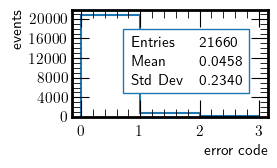

In [6]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "", "goff")
draw_1d_hist("kf_err_kskpi", 
             xlabel='error code',
            ylabel='events',
             fraction=0.47,
             info_coords=(0.3, 0.3),
            h_y=4000, h_x=1)
plt.savefig('kf_err_simhypo_xkpi.eps')

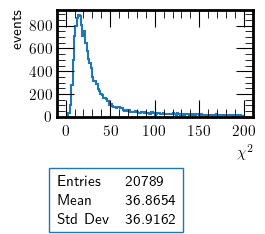

In [7]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(128,0,200)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_kskpi", xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.47,
             info_coords=(0.0,-1.0),
            h_y=200, h_x=50)
plt.savefig('kf_chi2_simhypo_xkpi.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


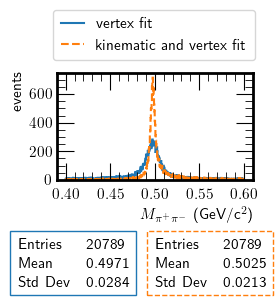

In [8]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx_mks>>kf_vtx_mks(512,0.4,0.6)", "kf_err==0", "goff")
draw_1d_hists([('kf_vtx_mks', 'vertex fit'), 
               ('kf_mks', 'kinematic and vertex fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
              fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_y=200, h_x=0.05)
plt.savefig('kf_mks_simhypo_xkpi.eps',  bbox_inches='tight')

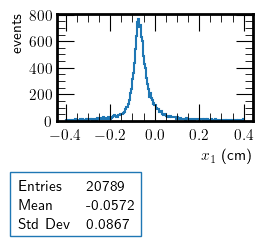

In [9]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -0.4, 0.4)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx0_x", 
             xlabel='$x_1$ (cm)',
            ylabel='events',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
            h_y=200, h_x=0.2)
plt.savefig("kskpi_vtx0_x.eps")

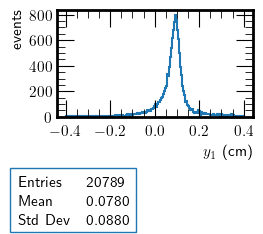

In [10]:
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -0.4, 0.4)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx0_y", 
             xlabel='$y_1$ (cm)',
            ylabel='events',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
            h_y=200, h_x=0.2)
plt.savefig("kskpi_vtx0_y.eps")

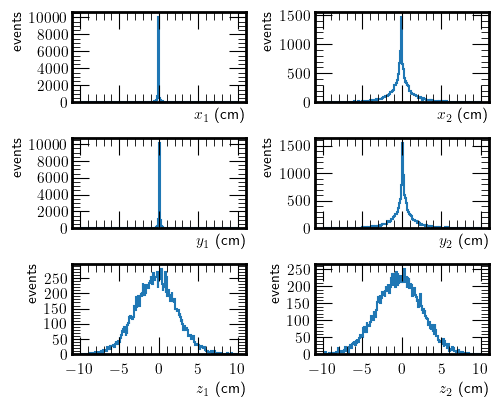

In [12]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(256, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(256, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(256, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(256, -10, 10)", "kf_err==0", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
               hspace=0.4,
               wspace=0.4,
            info_coords=(0.6, 0.6),
              hs_y=[[2000, 500], [2000, 500], [50, 50]],
              hs_x=[[5, 5], [5, 5], [5, 5]])
plt.savefig("kskpi_vtx0_vtx1_xyz.eps")

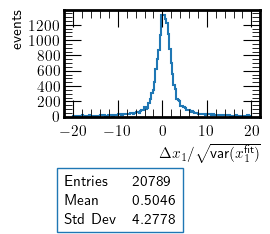

In [37]:
fl.kf_data.Draw("(kf_vtx0[0]-sim_ee_vtx[0])/sigma_x_vtx0 >>kf_vtx_dx1(128, -20, 20)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dx1", 
             xlabel=r'$\Delta x_{1}/\sqrt{\text{var}(x^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=200, h_x=10.0)
plt.savefig('kskpi_vtxsigma_vtx0_dx_pull.eps', bbox_inches='tight')

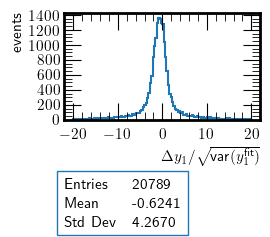

In [38]:
fl.kf_data.Draw("(kf_vtx0[1]-sim_ee_vtx[1])/sigma_y_vtx0 >>kf_vtx_dy1(128, -20, 20)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dy1", 
             xlabel=r'$\Delta y_{1}/\sqrt{\text{var}(y^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=200, h_x=10.0)
plt.savefig('kskpi_vtxsigma_vtx0_dy_pull.eps', bbox_inches='tight')

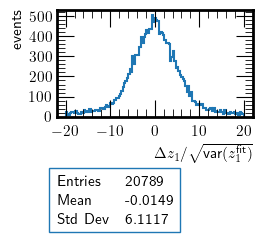

In [39]:
fl.kf_data.Draw("(kf_vtx0[2]-sim_ee_vtx[2])/sigma_z_vtx0 >>kf_vtx_dz1(128, -20, 20)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz1", 
             xlabel=r'$\Delta z_{1}/\sqrt{\text{var}(z^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=100, h_x=10.0)
plt.savefig('kskpi_vtxsigma_vtx0_dz_pull.eps', bbox_inches='tight')

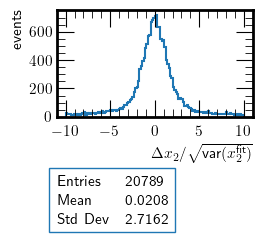

In [40]:
fl.kf_data.Draw("(kf_vtx1[0]-sim_ks_vtx[0])/sigma_x_vtx1 >>kf_vtx_dx2(128, -10.0, 10.0)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dx2", 
             xlabel=r'$\Delta x_{2} / \sqrt{\text{var}(x^{\text{fit}}_2)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=200, h_x=5.0)
plt.savefig('kskpi_vtxsigma_vtx1_dx_pull.eps', bbox_inches='tight')

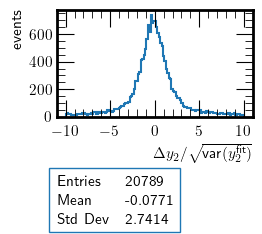

In [41]:
fl.kf_data.Draw("(kf_vtx1[1]-sim_ks_vtx[1])/sigma_y_vtx1>>kf_vtx_dy2(128, -10.0, 10.0)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dy2", 
             xlabel=r'$\Delta y_{2} / \sqrt{\text{var}(y^{\text{fit}}_2)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=200, h_x=5.0)
plt.savefig('kskpi_vtxsigma_vtx1_dy_pull.eps', bbox_inches='tight')

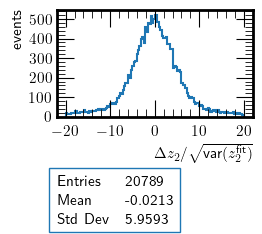

In [42]:
fl.kf_data.Draw("(kf_vtx1[2]-sim_ks_vtx[2])/sigma_z_vtx1>>kf_vtx_dz2(128, -20., 20.)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz2", 
             xlabel=r'$\Delta z_{2} / \sqrt{\text{var}(z^{\text{fit}}_2)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=100, h_x=10.0)
plt.savefig('kskpi_vtxsigma_vtx1_dz_pull.eps', bbox_inches='tight')

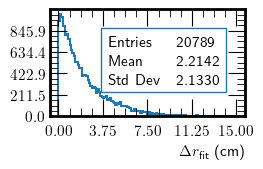

In [12]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(128, 0, 15)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dr", 
             xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
            fraction=0.47,
            info_coords=(0.3, 0.3))
# plt.savefig('kf_vtx_dr_simhypo_xkpi.eps')

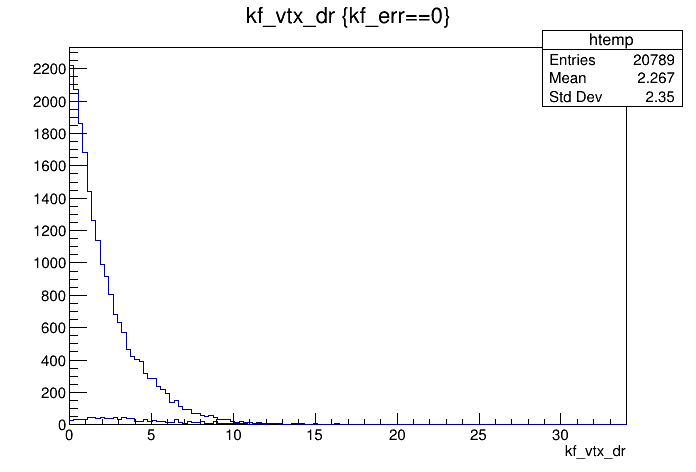

In [13]:
cnv = TCanvas()
fl.kf_data.Draw("kf_vtx_dr", "kf_err==0")
fl.kf_data.Draw("kf_vtx_dr", "kf_err==0 && numiters>6", "same")
cnv.Draw()

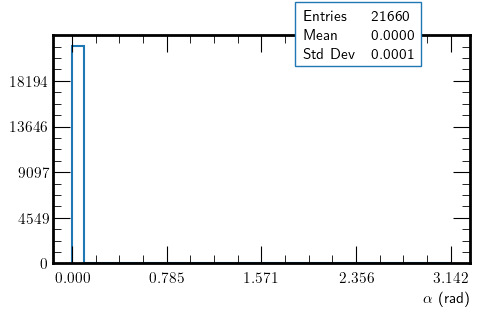

In [14]:
fl.kf_data.Draw("kf_ks_decay_prod_angle>>kf_angle(32, 0, 3.14159)", "", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_kskpi.eps')

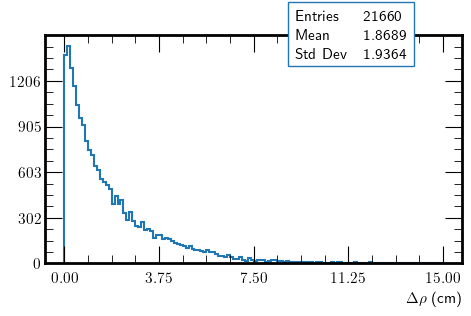

In [15]:
fl.kf_data.Draw("kf_vtx_drho>>kf_vtx_drho(128, 0, 15)", "", "goff")
draw_1d_hist("kf_vtx_drho", xlabel=r'$\Delta\rho$ (cm)')
plt.savefig('kf_vtx_drho_kskpi.eps')

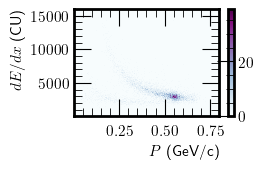

In [16]:
fl.kf_data.Draw("kf_dedx_vtx0_K:kf_p_vtx0_K>>pdedx_K(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_K', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_K_from_vtx0_simhypo_xkpi.eps')

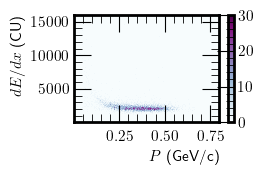

In [17]:
fl.kf_data.Draw("kf_dedx_vtx0_pi:kf_p_vtx0_pi>>pdedx_vtx0_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx0_pi', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx0_simhypo_xkpi.eps')

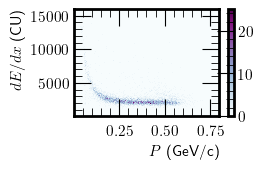

In [18]:
fl.kf_data.Draw("kf_dedx_vtx1_pi[0]:kf_p_vtx1_pi[0]>>pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_dedx_vtx1_pi[1]:kf_p_vtx1_pi[1]>>+pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx1_pi', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx1_simhypo_xkpi.eps')

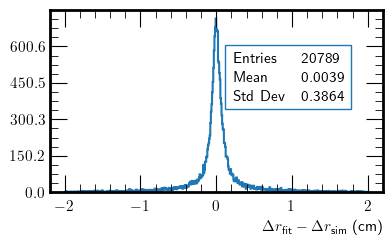

In [19]:
fl.kf_data.Draw("(kf_vtx_dr-sim_vtx_dr)>>kf_delta_dr(512, -2, 2)", "kf_err==0", "goff")
draw_1d_hist("kf_delta_dr", 
             xlabel=r'$\Delta r_{\text{fit}}-\Delta r_{\text{sim}}$ (cm)',
            fraction=0.8,
            info_coords=(0.55, 0.5))
plt.savefig('kf_sim_vs_kf_dr_1d_xkpi.eps')

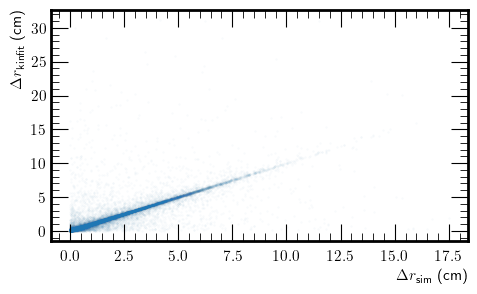

In [20]:
fl.kf_data.Draw(">>elist", "kf_err==0", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr.eps')

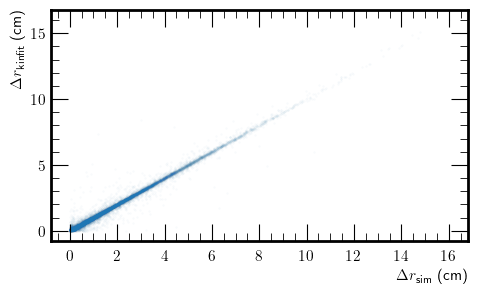

In [21]:
fl.kf_data.Draw(">>elist", "kf_err==0 && kf_chi2<100", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr_chi2_100.eps')

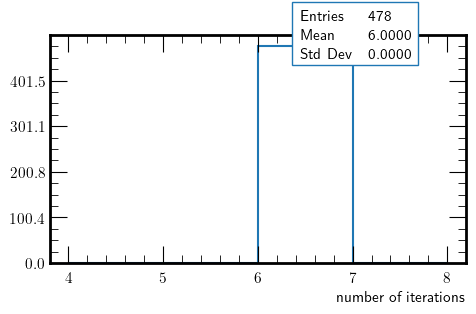

In [22]:
fl.kf_data.Draw("numiters>>numiters", "kf_err==0 && numiters==6", "goff")
draw_1d_hist("numiters", xlabel=r'number of iterations')

In [23]:
i2 = 2384 / 20519
i3 = 11030 / 20519
i4 = 3996 / 20519
i5 = 1231 / 20519
i6 = 543 / 20519
print(i2 + i3 + i4 + i5 + i6)

0.934938349822116


In [24]:
# fl.Close()